In [ ]:
from google.colab import files
uploaded=files.upload()

Saving bbmp-street-dogs-survey-2023.csv to bbmp-street-dogs-survey-2023.csv


In [ ]:
import pandas as pd
data=pd.read_csv("bbmp-street-dogs-survey-2023.csv")
data

,BBMP Zone,Population,95% Confidence Interval (CI),Male,Female,Unknown,Neutered (%),Area,Dogs per sq. km
0,East,37685,36993-38377,21584,11228,4873,71.75,90.57,416.09
1,West,22025,21493-22557,13870,6261,1894,79.48,50.10,439.62
2,South,23241,22692-23790,13116,7066,3059,77.32,61.08,380.50
3,Dasarahalli,21221,20700-21742,14580,4850,1791,77.46,27.83,762.52
4,RR Nagar,41266,40541-41991,24638,11899,4729,67.64,115.40,357.59
5,Bommanahalli,39183,38475-39891,23860,9299,6024,72.18,99.34,394.43
6,Yalahanka,36343,35679-37007,21165,13282,1896,66.50,98.52,368.89
7,Mahadevapura,58341,57513-59229,32528,18872,6971,59.34,169.71,343.77
8,TOTAL,279335,277450-281220,165341,82757,31237,71.81,712.55,392.02


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BBMP Zone                     9 non-null      object 
 1   Population                    9 non-null      int64  
 2   95% Confidence Interval (CI)  9 non-null      object 
 3   Male                          9 non-null      int64  
 4   Female                        9 non-null      int64  
 5   Unknown                       9 non-null      int64  
 6   Neutered (%)                  9 non-null      float64
 7   Area                          9 non-null      float64
 8   Dogs per sq. km               9 non-null      float64
dtypes: float64(3), int64(4), object(2)
memory usage: 776.0+ bytes


In [ ]:
data.describe()

,Population,Male,Female,Unknown,Neutered (%),Area,Dogs per sq. km
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,62071.111111,36742.444444,18390.444444,6941.555556,71.497778,158.344444,428.381111
std,82318.776458,48622.000849,24505.574616,9306.070789,6.338972,211.831984,128.648360
min,21221.000000,13116.000000,4850.000000,1791.000000,59.340000,27.830000,343.770000
25%,23241.000000,14580.000000,7066.000000,1896.000000,67.640000,61.080000,368.890000
50%,37685.000000,21584.000000,11228.000000,4729.000000,71.810000,98.520000,392.020000
75%,41266.000000,24638.000000,13282.000000,6024.000000,77.320000,115.400000,416.090000
max,279335.000000,165341.000000,82757.000000,31237.000000,79.480000,712.550000,762.520000


In [ ]:
data.isnull().sum()

BBMP Zone                       0
Population                      0
95% Confidence Interval (CI)    0
Male                            0
Female                          0
Unknown                         0
Neutered (%)                    0
Area                            0
Dogs per sq. km                 0
dtype: int64

In [ ]:
data.shape

(9, 9)

##PHASE 3:
#EXPLORATORY DATA ANALYSIS:
1.What is the overall distribution of street dog population across different zones in the city?


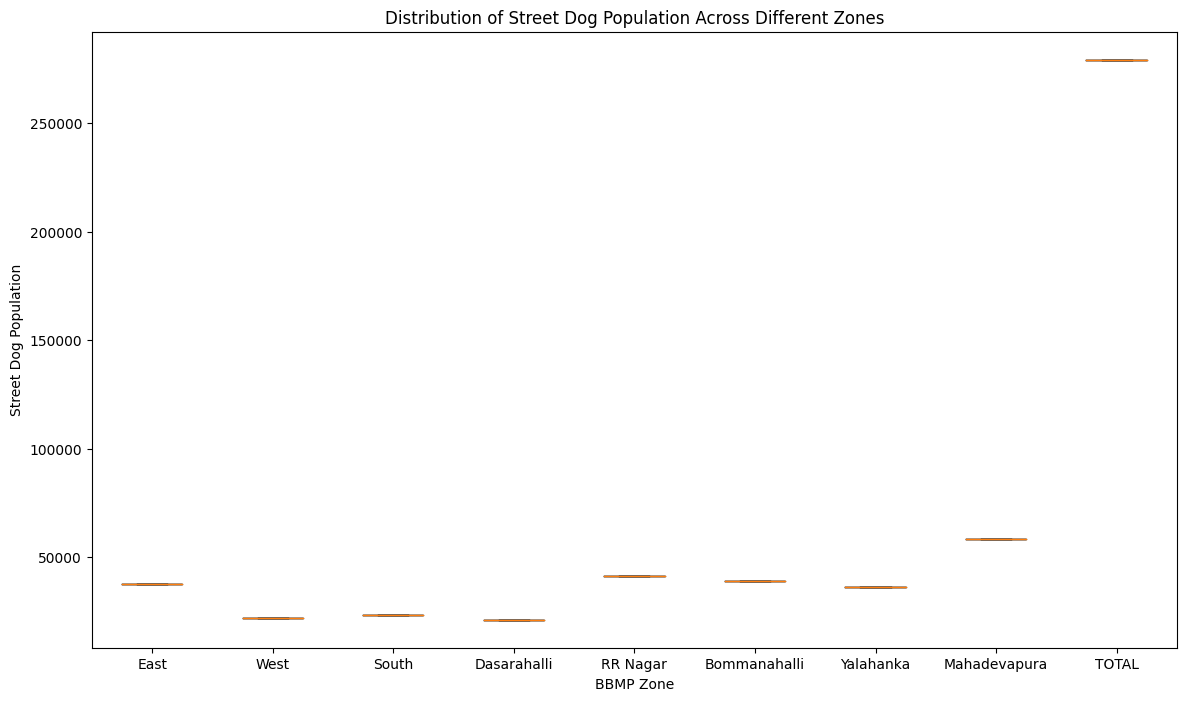

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Assuming your dataset has columns 'BBMP Zone' and 'Population'
plt.figure(figsize=(14, 8))
plt.boxplot([data[data['BBMP Zone'] == zone]['Population'] for zone in data['BBMP Zone'].unique()],
        	labels=data['BBMP Zone'].unique())
plt.title('Distribution of Street Dog Population Across Different Zones')
plt.xlabel('BBMP Zone')
plt.ylabel('Street Dog Population')
plt.show()


2. Are there any outliers in the dataset that need to be investigated further?
pip install pandas matplotlib scipy

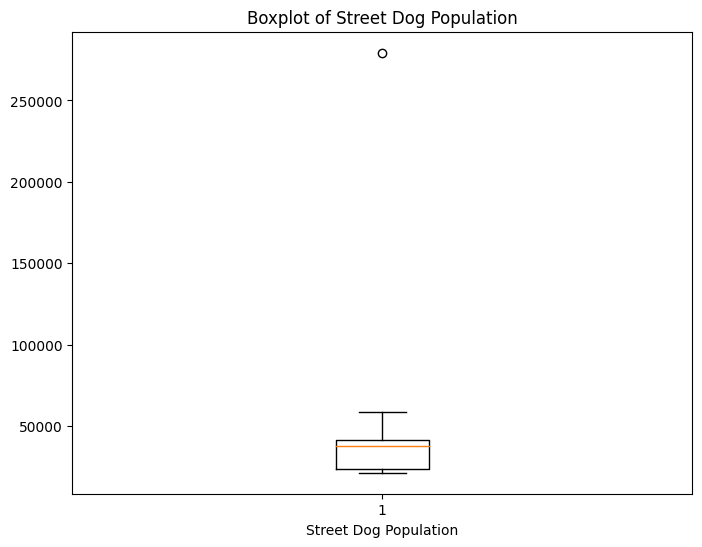

Identified Outliers:
Empty DataFrame
Columns: [BBMP Zone, Population, 95% Confidence Interval (CI), Male, Female, Unknown, Neutered (%), Area, Dogs per sq. km]
Index: []


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
# Assuming your dataset has a column 'StreetDogPopulation' to investigate
street_dog_population = data['Population']

# Calculate Z-scores
z_scores = zscore(street_dog_population)

# Set a threshold for Z-scores (e.g., 3 standard deviations from the mean)
z_score_threshold = 3

# Identify outliers
outliers = data[abs(z_scores) > z_score_threshold]

# Visualize the distribution with a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(street_dog_population)
plt.title('Boxplot of Street Dog Population')
plt.xlabel('Street Dog Population')
plt.show()
# Display the identified outliers
print('Identified Outliers:')
print(outliers)



3. How does the neutering rate vary across different zones in the city?

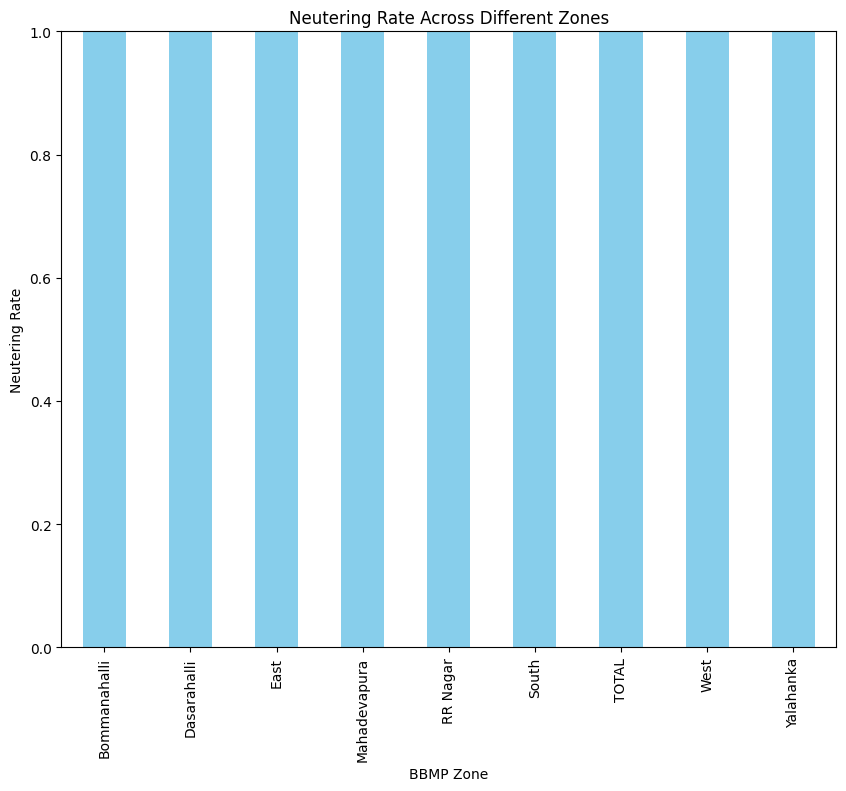

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Assuming your dataset has columns 'BBMP Zone', 'Gender', and 'Neutered'
# Calculate the neutering rate for each zone
neutering_rate_by_zone = data.groupby('BBMP Zone')['Neutered (%)'].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 8))
neutering_rate_by_zone.plot(kind='bar', color='skyblue')
plt.title('Neutering Rate Across Different Zones')
plt.xlabel('BBMP Zone')
plt.ylabel('Neutering Rate')
plt.ylim(0, 1)  # Ensure y-axis range is between 0 and 1 for a percentage
plt.show()


4. Which BBMP zone has the highest population of street dogs?


In [ ]:
import pandas as pd
# Assuming your dataset has columns 'BBMPZone' and 'StreetDogPopulation'
# Find the BBMP zone with the highest population of street dogs
max_population_zone = data.loc[data['Population'].idxmax()]['BBMP Zone']

print(f'The BBMP zone with the highest population of street dogs is: {max_population_zone}')


The BBMP zone with the highest population of street dogs is: TOTAL


5. How do the male and female street dog populations compare in each BBMP zone?

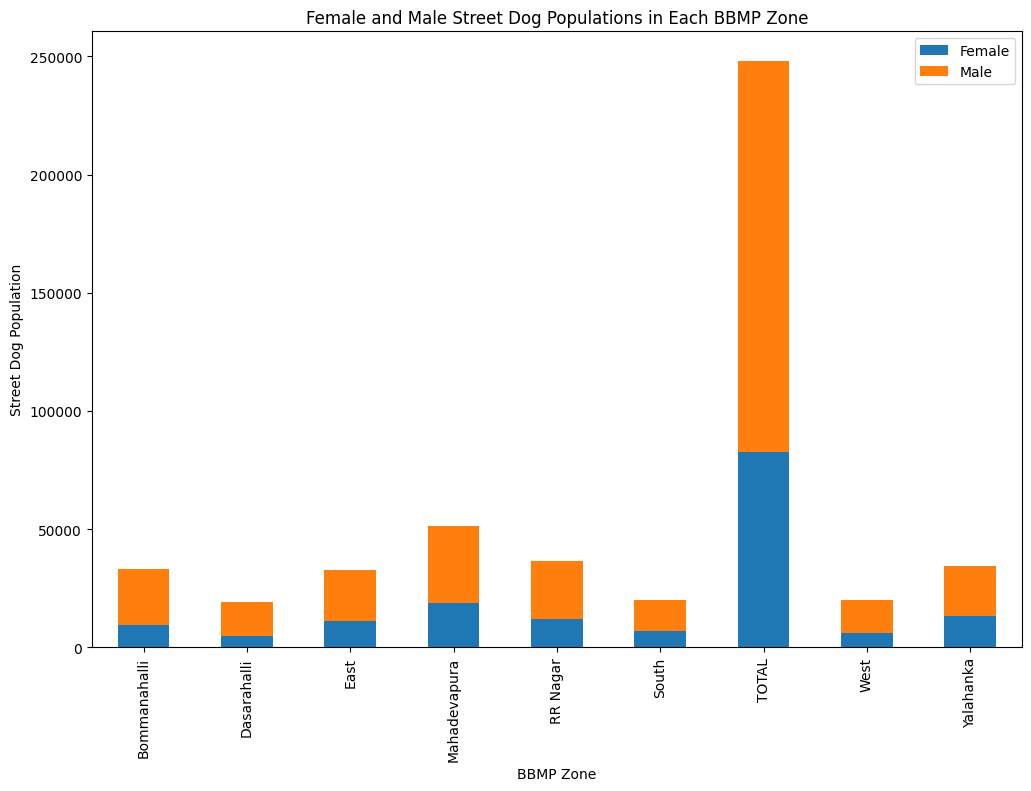

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Assuming your dataset has columns 'BBMPZone', 'Female', 'Male', and 'StreetDogPopulation'
# Pivot the data to create a bar chart comparing female and male street dog populations in each BBMP zone
gender_pivot = data.pivot_table(index='BBMP Zone', values=['Female', 'Male'], aggfunc='sum')

# Plotting the bar chart
gender_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Female and Male Street Dog Populations in Each BBMP Zone')
plt.xlabel('BBMP Zone')
plt.ylabel('Street Dog Population')
plt.show()


7. Are there any zones where the number of neutered street dogs is significantly higher?

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
# Assuming your dataset has columns like 'Neutered' and 'Zone'

# Create a contingency table
contingency_table = pd.crosstab(data['Neutered (%)'], data['BBMP Zone'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-square Test Results:")
print("Chi2 Statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

# Check for statistical significance
alpha = 0.05
if p_value < alpha:
    print("\nThere is a significant association between neutering status and zones.")
else:
    print("\nThere is no significant association between neutering status and zones.")


Contingency Table:
BBMP Zone     Bommanahalli  Dasarahalli  East  Mahadevapura  RR Nagar  South  \
Neutered (%)                                                                   
59.34                    0            0     0             1         0      0   
66.50                    0            0     0             0         0      0   
67.64                    0            0     0             0         1      0   
71.75                    0            0     1             0         0      0   
71.81                    0            0     0             0         0      0   
72.18                    1            0     0             0         0      0   
77.32                    0            0     0             0         0      1   
77.46                    0            1     0             0         0      0   
79.48                    0            0     0             0         0      0   

BBMP Zone     TOTAL  West  Yalahanka  
Neutered (%)                          
59.34             0   

##UNIVARIATE ANALYSIS:
#1.What is the average population of street dogs in each BBMP zone?


In [ ]:
import pandas as pd

# Assuming your dataset has columns 'BBMPZone' and 'StreetDogPopulation'
# Calculate the average population for each BBMP zone
average_population_by_zone = data.groupby('BBMP Zone')['Population'].mean()

# Display the average population for each BBMP zone
print(average_population_by_zone)


BBMP Zone
Bommanahalli     39183.0
Dasarahalli      21221.0
East             37685.0
Mahadevapura     58341.0
RR Nagar         41266.0
South            23241.0
TOTAL           279335.0
West             22025.0
Yalahanka        36343.0
Name: Population, dtype: float64


#2. How does the population of male street dogs vary across different zones?

Descriptive Statistics for Male Street Dogs:
              count      mean  std       min       25%       50%       75%  \
BBMP Zone                                                                    
Bommanahalli    1.0   39183.0  NaN   39183.0   39183.0   39183.0   39183.0   
Dasarahalli     1.0   21221.0  NaN   21221.0   21221.0   21221.0   21221.0   
East            1.0   37685.0  NaN   37685.0   37685.0   37685.0   37685.0   
Mahadevapura    1.0   58341.0  NaN   58341.0   58341.0   58341.0   58341.0   
RR Nagar        1.0   41266.0  NaN   41266.0   41266.0   41266.0   41266.0   
South           1.0   23241.0  NaN   23241.0   23241.0   23241.0   23241.0   
TOTAL           1.0  279335.0  NaN  279335.0  279335.0  279335.0  279335.0   
West            1.0   22025.0  NaN   22025.0   22025.0   22025.0   22025.0   
Yalahanka       1.0   36343.0  NaN   36343.0   36343.0   36343.0   36343.0   

                   max  
BBMP Zone               
Bommanahalli   39183.0  
Dasarahalli    21221.

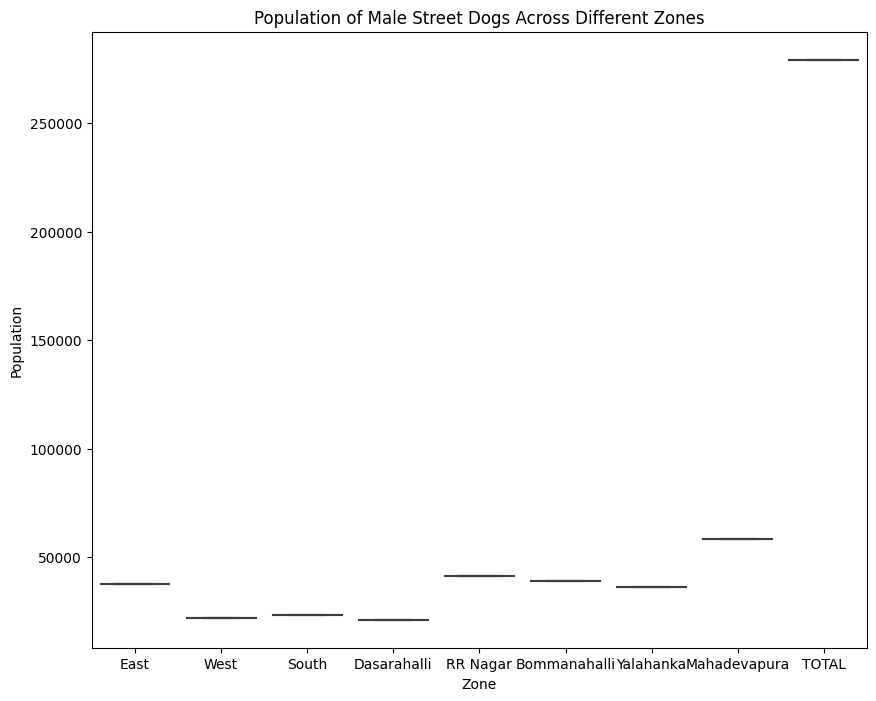

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Create a new column 'Gender' based on the presence of 'Male'
data['Gender'] = data[['Female', 'Male']].idxmax(axis=1)

# Filter data for male street dogs
male_dogs = data[data['Gender'] == 'Male']

# Display descriptive statistics
male_population_stats = male_dogs.groupby('BBMP Zone')['Population'].describe()
print("Descriptive Statistics for Male Street Dogs:")
print(male_population_stats)

# Create a boxplot to visualize the distribution
plt.figure(figsize=(10, 8))
sns.boxplot(x='BBMP Zone', y='Population', data=male_dogs)
plt.title('Population of Male Street Dogs Across Different Zones')
plt.xlabel('Zone')
plt.ylabel('Population')
plt.show()


#3. What is the distribution of female street dogs in terms of population in each zone?


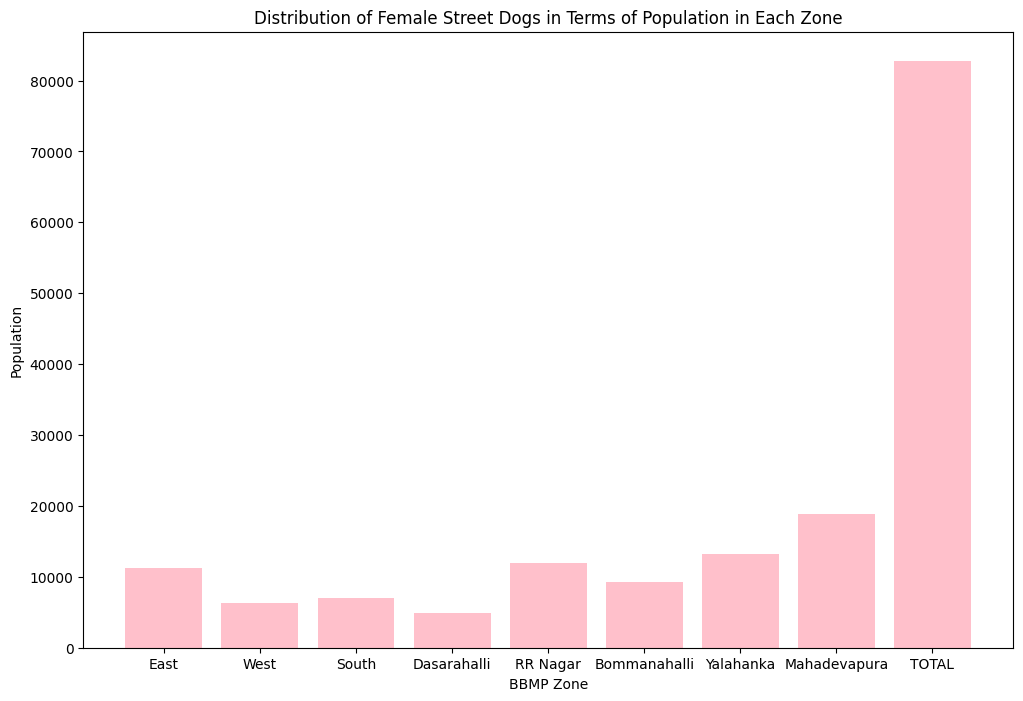

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Assuming your dataset has columns 'BBMP Zone', 'Female', and 'StreetDogPopulation'
# Create a bar chart to show the distribution of female street dogs in terms of population in each BBMP zone
plt.figure(figsize=(12, 8))
plt.bar(data['BBMP Zone'], data['Female'], color='pink')
plt.title('Distribution of Female Street Dogs in Terms of Population in Each Zone')
plt.xlabel('BBMP Zone')
plt.ylabel('Population')
plt.show()


#4. Are there any zones with a high number of unknown gender street dogs?


In [ ]:
import pandas as pd

# Assuming your dataset has columns 'BBMPZone', 'UnknownGender', and 'StreetDogPopulation'
# Calculate the proportion of unknown gender street dogs for each zone
data['UnknownGenderProportion'] = data['Unknown'] / data['Population']

# Set a threshold for considering zones with a high proportion of unknown gender street dogs
threshold = 0.1  # You can adjust this threshold based on your dataset and criteria

# Identify zones where the proportion of unknown gender street dogs is above the threshold
high_unknown_gender_zones = data[data['UnknownGenderProportion'] > threshold]['BBMP Zone'].unique()

print(f'Zones with a high number of unknown gender street dogs: {high_unknown_gender_zones}')


Zones with a high number of unknown gender street dogs: ['East' 'South' 'RR Nagar' 'Bommanahalli' 'Mahadevapura' 'TOTAL']



# 5. What is the range of neutered street dogs in each BBMP zone?


In [ ]:
import pandas as pd
# Assuming your dataset has columns 'BBMPZone', 'Neutered', and 'StreetDogPopulation'
# Filter the data for neutered street dogs
neutered_data = data[data['Neutered (%)'] == True]

# Calculate the range of neutered street dogs in each BBMP zone
range_neutered_by_zone = neutered_data.groupby('BBMP Zone')['Population'].agg(lambda x: x.max() - x.min())

print('Range of Neutered Street Dogs in Each BBMP Zone:')
print(range_neutered_by_zone)


Range of Neutered Street Dogs in Each BBMP Zone:
Series([], Name: Population, dtype: int64)


##BIVARIATE ANALYSIS:
#1.      Is there a relationship between the population size and the number of neutered street dogs in each BBMP zone?


In [57]:
import pandas as pd
import statsmodels.api as sm
# Assuming your dataset has columns like 'Population', 'Neutered', and 'Zone'

# Filter data for neutered street dogs
neutered_dogs = data[data['Neutered (%)'] == 'Yes']

# Loop through each unique zone and perform linear regression
for zone in data['BBMP Zone'].unique():
    zone_data = neutered_dogs[neutered_dogs['BBMP Zone'] == zone]

    # Add a constant term to the predictor
    X = sm.add_constant(zone_data['Population'])
    y = zone_data['Neutered (%)']

    # Fit a linear regression model
    model = sm.OLS(y, X).fit()

    # Display the regression summary for each zone
    print(f"\nRegression Summary for {zone}:")
    print(model.summary())


ValueError: ignored

#2.       How does the distribution of male and female street dogs vary across different BBMP zones?


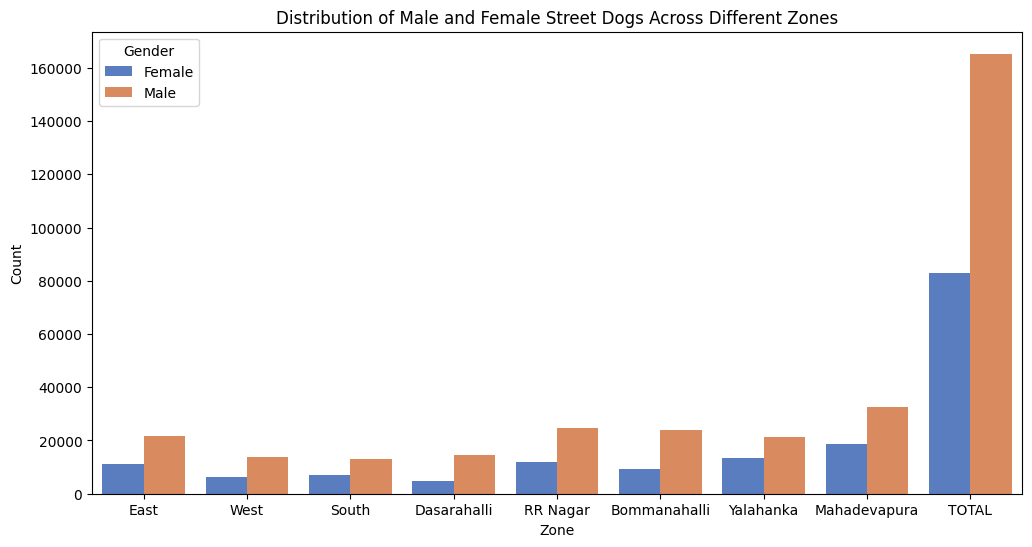

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming your dataset has columns like 'Female', 'Male', and 'Zone'

# Melt the dataset to create a 'Gender' column
df_melted = pd.melt(data, id_vars=['BBMP Zone'], value_vars=['Female', 'Male'], var_name='Gender', value_name='Count')

# Create a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='BBMP Zone', y='Count', hue='Gender', data=df_melted, palette='muted')
plt.title('Distribution of Male and Female Street Dogs Across Different Zones')
plt.xlabel('Zone')
plt.ylabel('Count')
plt.show()


#3.       Are there any differences in the population density of street dogs per square kilometer based on the area of each zone?


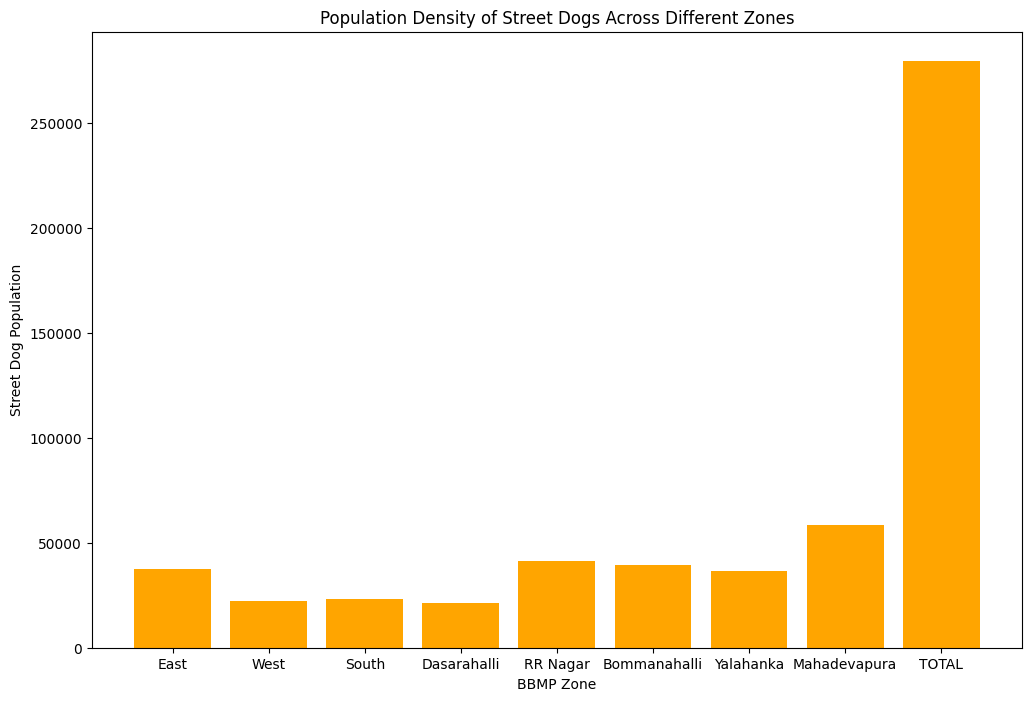

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
# Assuming your dataset has columns 'BBMPZone' and 'StreetDogPopulation'
# Create a bar chart to show the population density of street dogs for each zone
plt.figure(figsize=(12, 8))
plt.bar(data['BBMP Zone'], data['Population'], color='orange')
plt.title('Population Density of Street Dogs Across Different Zones')
plt.xlabel('BBMP Zone')
plt.ylabel('Street Dog Population')
plt.show()


#4.       Can we identify any correlations between the population size and the confidence interval of street dog populations in different zones?


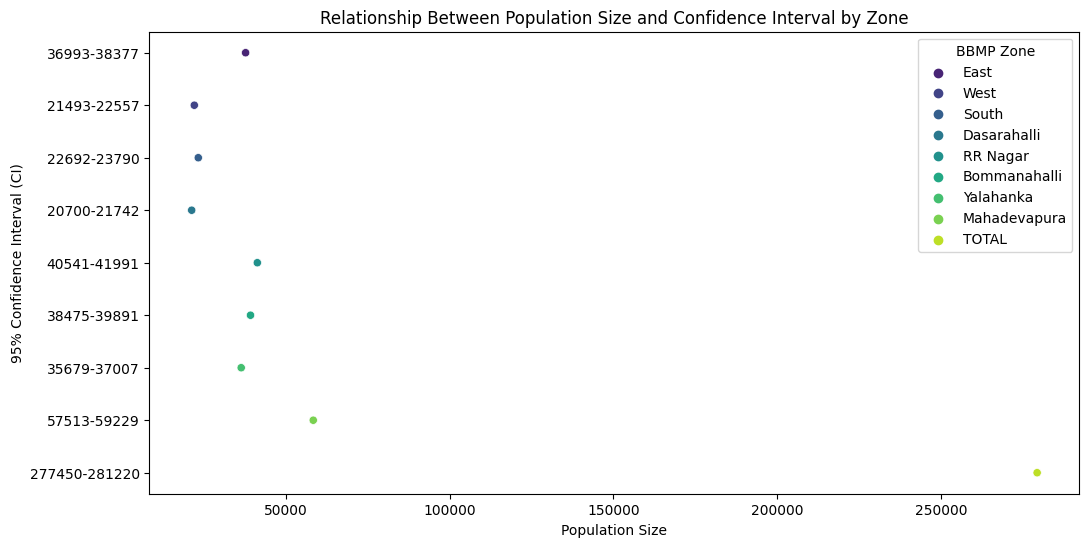

UFuncTypeError: ignored

In [62]:
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
# Assuming your dataset has columns like 'Population', 'Confidence Interval', and 'Zone'

# Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Population', y='95% Confidence Interval (CI)', hue='BBMP Zone', data=data, palette='viridis')
plt.title('Relationship Between Population Size and Confidence Interval by Zone')
plt.xlabel('Population Size')
plt.ylabel('95% Confidence Interval (CI)')
plt.show()

# Calculate Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(data['Population'], data['95% Confidence Interval (CI)'])
print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Check for statistical significance
alpha = 0.05
if p_value < alpha:
    print("There is a significant correlation between population size and the confidence interval.")
else:
    print("There is no significant correlation between population size and the confidence interval.")


#5.       Is there a relationship between the number of unknown gender street dogs and the population size in each BBMP zone?


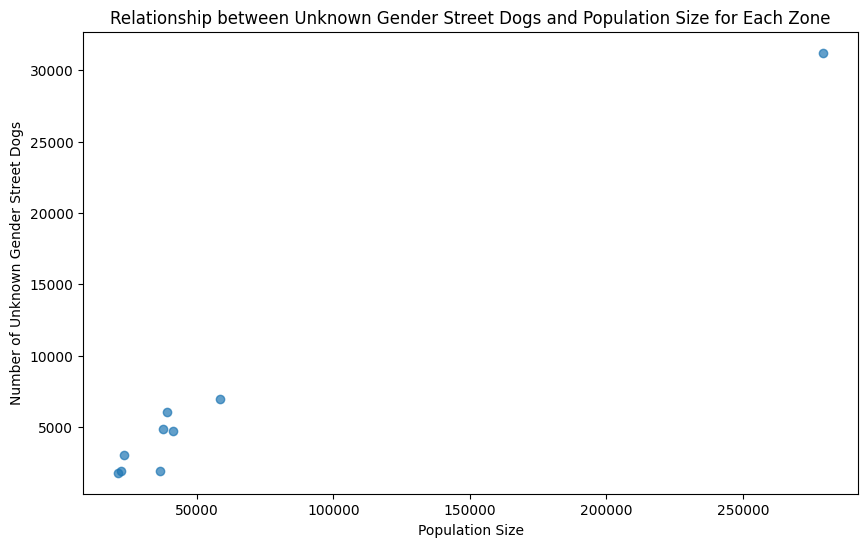

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
# Assuming your dataset has columns 'BBMPZone', 'StreetDogPopulation', and 'UnknownGender'
# Create a scatter plot to show the relationship between the number of unknown gender street dogs and population size
plt.figure(figsize=(10, 6))
plt.scatter(data['Population'], data['Unknown'], alpha=0.7)
plt.title('Relationship between Unknown Gender Street Dogs and Population Size for Each Zone')
plt.xlabel('Population Size')
plt.ylabel('Number of Unknown Gender Street Dogs')
plt.show()


##MULTIVARIATE ANALYSIS:
#1.      How does the population of male, female, and neutered street dogs vary across different BBMP zones?


TypeError: ignored

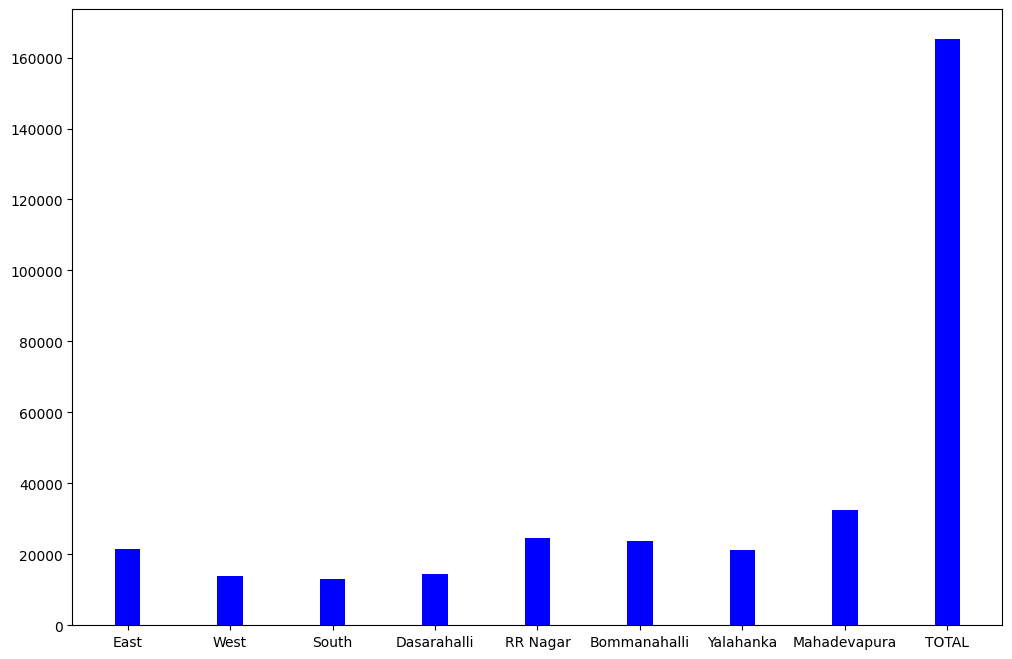

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
# Assuming your dataset has columns 'BBMPZone', 'MalePopulation', 'FemalePopulation', 'NeuteredPopulation'
# Grouped bar chart to show the distribution of male, female, and neutered street dogs across BBMP zones
plt.figure(figsize=(12, 8))
bar_width = 0.25  # Width of each bar

bar1 = plt.bar(data['BBMP Zone'], data['Male'], bar_width, label='Male', color='blue')
bar2 = plt.bar(data['BBMP Zone'] + bar_width, data['Female'], bar_width, label='Female', color='pink')
bar3 = plt.bar(data['BBMP Zone'] + 2*bar_width, data['Neutered (%)'], bar_width, label='Neutered', color='green')

plt.xlabel('BBMP Zone')
plt.ylabel('Street Dog Population')
plt.title('Distribution of Male, Female, and Neutered Street Dogs Across Different Zones')
plt.legend()
plt.show()


#2.      Can we identify any patterns between the population size, area, and density of street dogs per square kilometer in each zone?

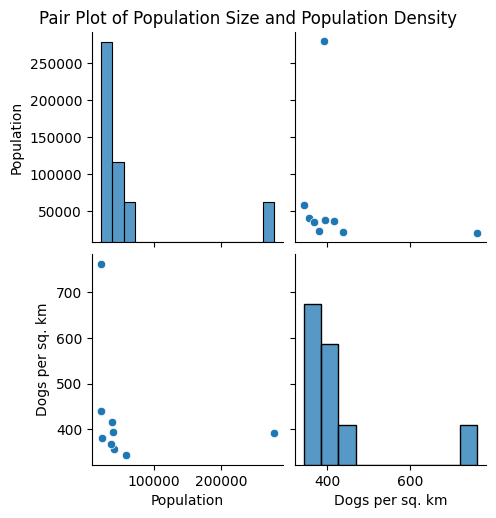

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming your dataset has columns 'BBMPZone', 'StreetDogPopulation', 'PopulationDensity'
# Select relevant columns for pair plot
pair_plot_data = data[['Population', 'Dogs per sq. km']]

# Create a pair plot to visualize relationships
sns.pairplot(pair_plot_data)
plt.suptitle('Pair Plot of Population Size and Population Density', y=1.02)
plt.show()


#3.      Are there any correlations between the confidence interval of street dog populations and the number of unknown gender dogs in each BBMP zone?


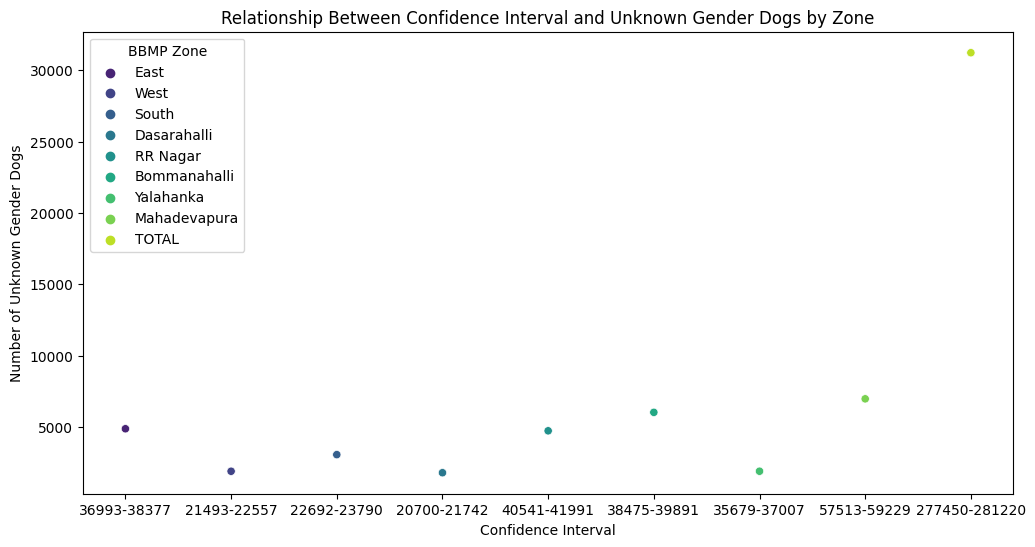

TypeError: ignored

In [67]:
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming your dataset has columns like 'Confidence Interval', 'Unknown Gender', and 'Zone'

# Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='95% Confidence Interval (CI)', y='Unknown', hue='BBMP Zone', data=data, palette='viridis')
plt.title('Relationship Between Confidence Interval and Unknown Gender Dogs by Zone')
plt.xlabel('Confidence Interval')
plt.ylabel('Number of Unknown Gender Dogs')
plt.show()

# Calculate Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(data['95% Confidence Interval (CI)'], data['Unknown'])
print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Check for statistical significance
alpha = 0.05
if p_value < alpha:
    print("There is a significant correlation between the confidence interval and the number of unknown gender dogs.")
else:
    print("There is no significant correlation between the confidence interval and the number of unknown gender dogs.")


#4.      Can we analyze the relationship between the population size, neutered dogs, and confidence interval in different areas?


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


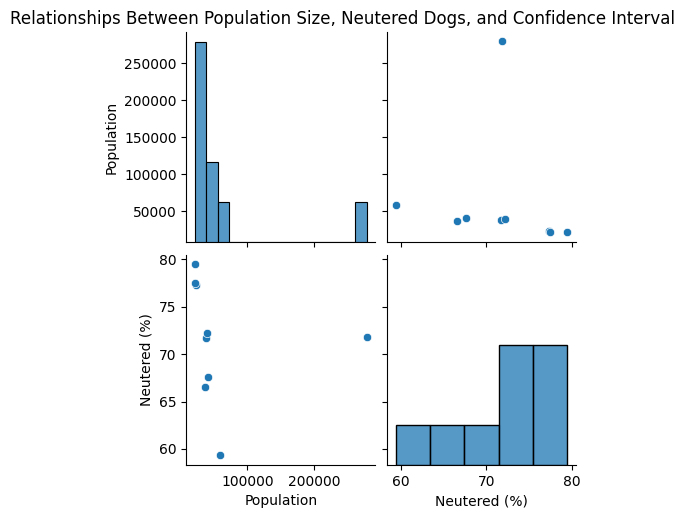

UFuncTypeError: ignored

In [72]:
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
# Assuming your dataset has columns like 'Population', 'Neutered', 'Confidence Interval', and 'Area'

# Scatter plot matrix with correlation coefficients
sns.pairplot(data[['Population', 'Neutered (%)', '95% Confidence Interval (CI)']], palette='viridis')
plt.suptitle('Relationships Between Population Size, Neutered Dogs, and Confidence Interval', y=1.02)
plt.show()

# Calculate Pearson correlation coefficients
correlation_population_neutered = pearsonr(data['Population'], data['Neutered (%)'])[0]
correlation_population_confidence = pearsonr(data['Population'], data['95% Confidence Interval (CI)'])[0]
correlation_neutered_confidence = pearsonr(data['Neutered (%)'], data['95% Confidence Interval (CI)'])[0]

print("Pearson Correlation Coefficient between Population and Neutered Dogs:", correlation_population_neutered)
print("Pearson Correlation Coefficient between Population and Confidence Interval:", correlation_population_confidence)
print("Pearson Correlation Coefficient between Neutered Dogs and Confidence Interval:", correlation_neutered_confidence)


##VISUALIZATION OF GRAPHS LIKE BOX,LINE,CROSSTAB,LINE PLOT ETC…..
#1.      Univariate Analysis: -
a.      Bar Plot: How does the population of street dogs vary across different BBMP zones? –


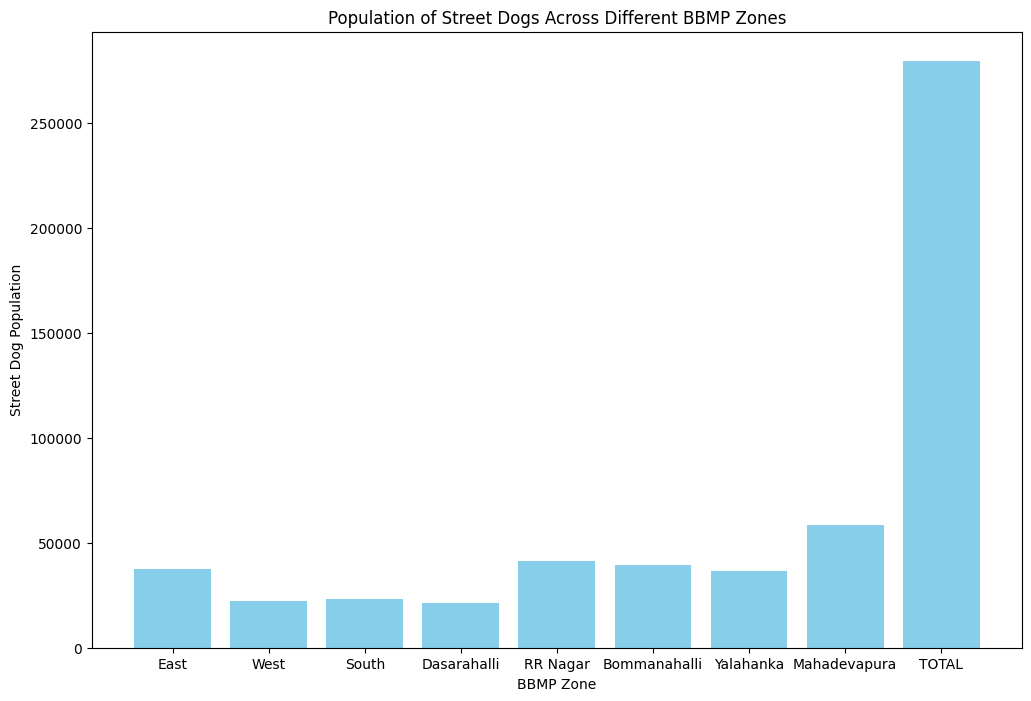

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
# Assuming your dataset has columns 'BBMPZone' and 'StreetDogPopulation'
# Create a bar plot to show the population of street dogs for each zone
plt.figure(figsize=(12, 8))
plt.bar(data['BBMP Zone'], data['Population'], color='skyblue')
plt.xlabel('BBMP Zone')
plt.ylabel('Street Dog Population')
plt.title('Population of Street Dogs Across Different BBMP Zones')
plt.show()


b.      Box Plot: What is the distribution of neutered street dogs in each BBMP zone?

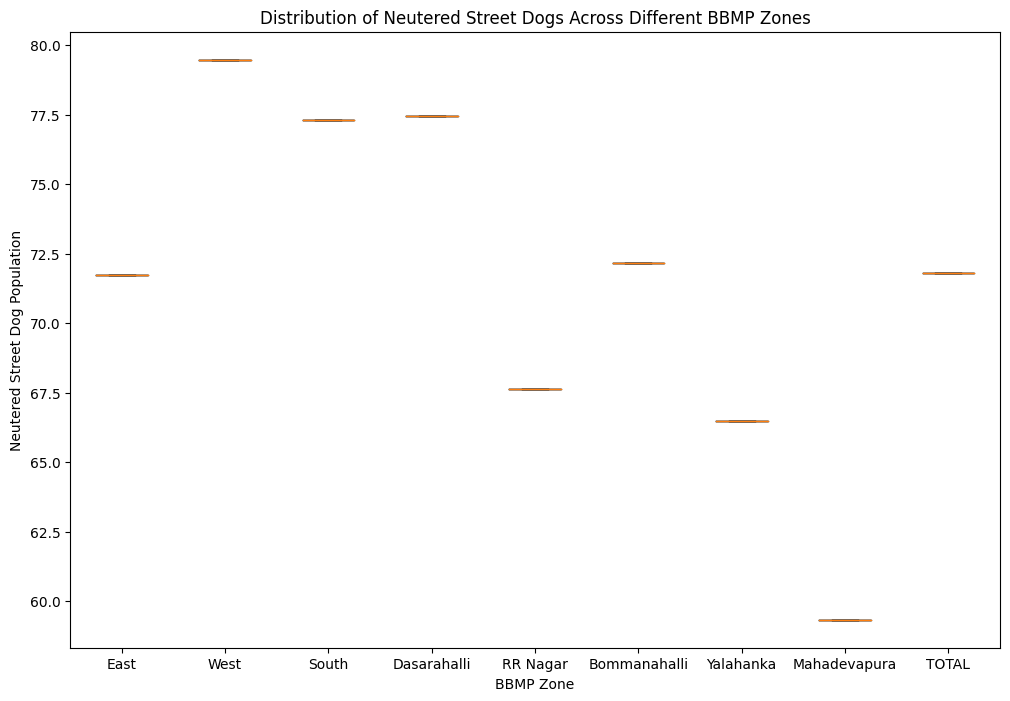

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset has columns 'BBMPZone' and 'NeuteredPopulation'
# Create a box plot to show the distribution of neutered street dogs in each zone
plt.figure(figsize=(12, 8))
plt.boxplot([data[data['BBMP Zone'] == zone]['Neutered (%)'] for zone in data['BBMP Zone'].unique()], labels=data['BBMP Zone'].unique())
plt.xlabel('BBMP Zone')
plt.ylabel('Neutered Street Dog Population')
plt.title('Distribution of Neutered Street Dogs Across Different BBMP Zones')
plt.show()


#2.      Bivariate Analysis: -
a.       Face Grid: Can we compare the distribution of male and female street dogs across different BBMP zones? –

<ipython-input-75-3423925dd670>:6: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  melted_data = pd.melt(data, id_vars=['BBMP Zone'], value_vars=['Male', 'Female'], var_name='Gender', value_name='Population')


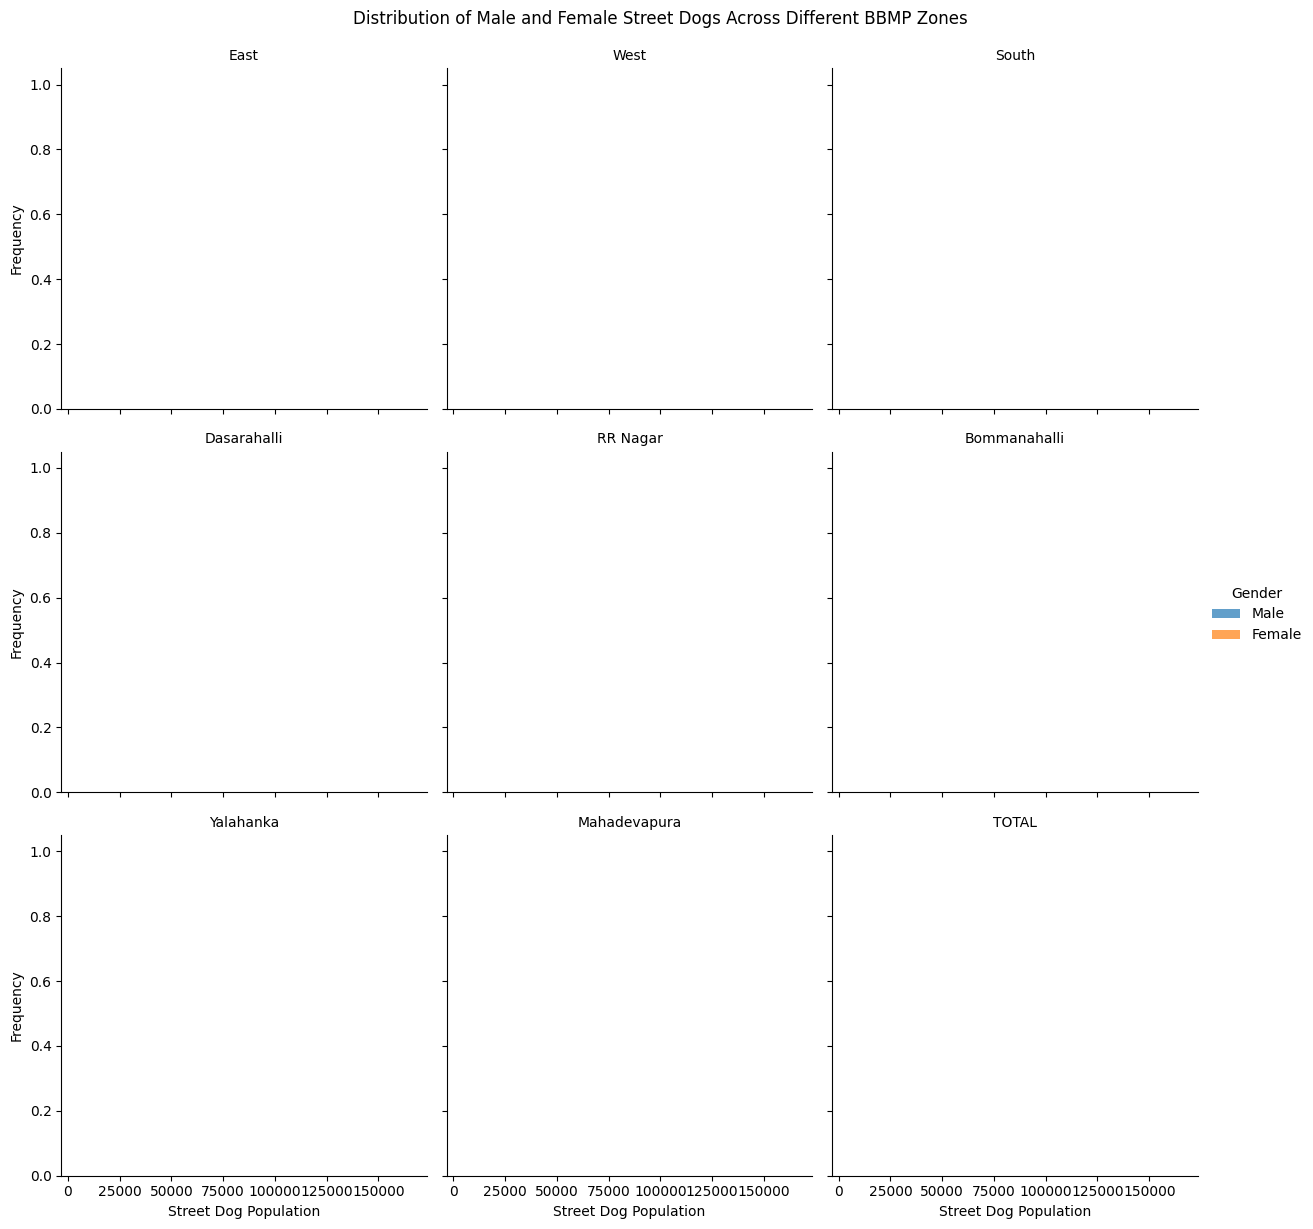

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming your dataset has columns 'BBMPZone', 'MalePopulation', and 'FemalePopulation'
# Melt the dataset to long format for FacetGrid
melted_data = pd.melt(data, id_vars=['BBMP Zone'], value_vars=['Male', 'Female'], var_name='Gender', value_name='Population')

# Create a FacetGrid to compare the distribution of male and female street dogs
g = sns.FacetGrid(melted_data, col='BBMP Zone', hue='Gender', col_wrap=3, height=4)
g.map(plt.hist, 'Population', bins=20, alpha=0.7)
g.add_legend()
g.set_axis_labels('Street Dog Population', 'Frequency')
g.set_titles(col_template='{col_name}')
plt.suptitle('Distribution of Male and Female Street Dogs Across Different BBMP Zones', y=1.02)
plt.show()


#3.       Multivariate Analysis: -
a.       Crosstab: Can we analyze the relationship between the confidence interval of street dog populations and the number of unknown gender dogs in each BBMP zone? –

Unknown                       1791   1894   1896   3059   4729   4873   6024   \
95% Confidence Interval (CI)                                                    
20700-21742                       1      0      0      0      0      0      0   
21493-22557                       0      1      0      0      0      0      0   
22692-23790                       0      0      0      1      0      0      0   
277450-281220                     0      0      0      0      0      0      0   
35679-37007                       0      0      1      0      0      0      0   
36993-38377                       0      0      0      0      0      1      0   
38475-39891                       0      0      0      0      0      0      1   
40541-41991                       0      0      0      0      1      0      0   
57513-59229                       0      0      0      0      0      0      0   

Unknown                       6971   31237  
95% Confidence Interval (CI)                
20700-21742       

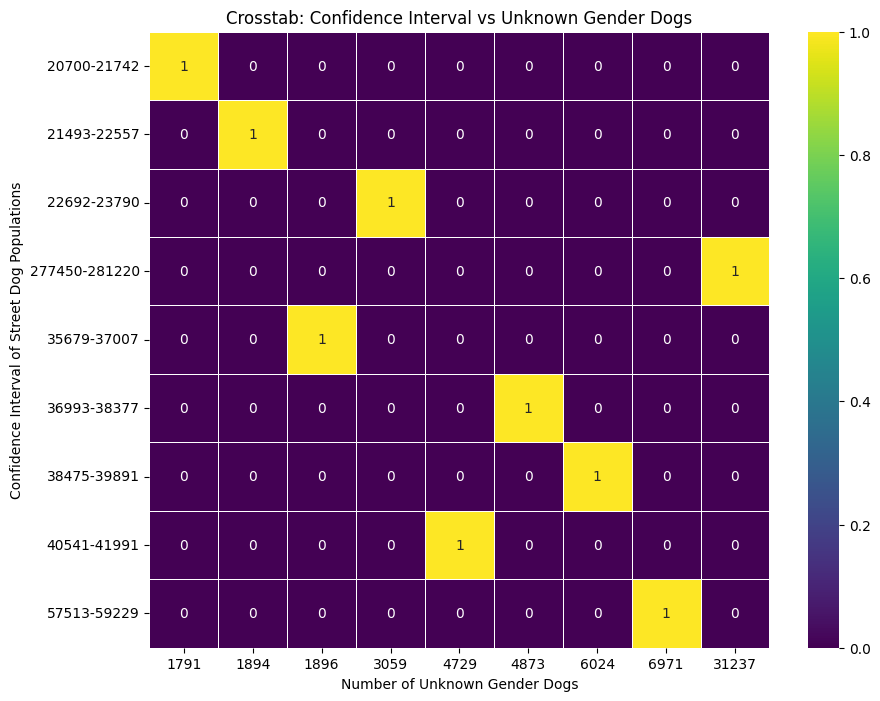

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a crosstab to analyze the relationship
crosstab = pd.crosstab(data['95% Confidence Interval (CI)'], data['Unknown'])

# Display the crosstab
print(crosstab)

# Create a heatmap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(crosstab, annot=True, cmap='viridis', fmt="d", linewidths=.5)
plt.title('Crosstab: Confidence Interval vs Unknown Gender Dogs')
plt.xlabel('Number of Unknown Gender Dogs')
plt.ylabel('Confidence Interval of Street Dog Populations')
plt.show()


b.      Line Plot: How does the population size, neutered dogs, and confidence interval vary in different areas?


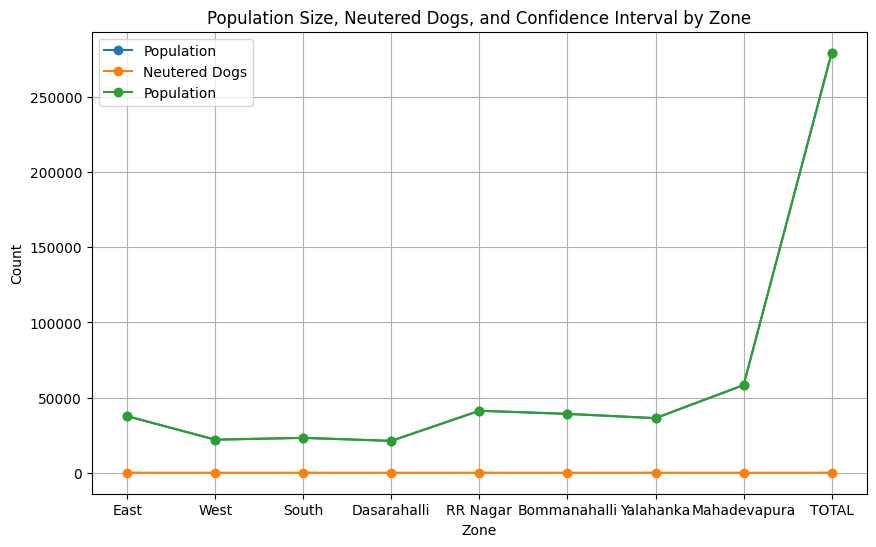

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a line plot
plt.figure(figsize=(10, 6))

# Plot population size
plt.plot(data['BBMP Zone'], data['Population'], marker='o', label='Population')

# Plot neutered dogs
plt.plot(data['BBMP Zone'], data['Neutered (%)'], marker='o', label='Neutered Dogs')

# Plot confidence interval
plt.plot(data['BBMP Zone'], data['Population'], marker='o', label='Population')

# Set labels and title
plt.xlabel('Zone')
plt.ylabel('Count')
plt.title('Population Size, Neutered Dogs, and Confidence Interval by Zone')
plt.legend()
plt.grid(True)
plt.show()
